In [1]:
from utils_ray import get_info_state, activate_memory_growth; activate_memory_growth(cpu=False)
import tensorflow as tf
from copy import deepcopy, copy
import clubs
import clubs_gym
import gym
from PokerAgent import TensorflowAgent
import time
from random import shuffle
import time
import numpy as np
from utils_ray import print_obs

[INFO] - Models trained on GPU, with memory growth activated.


In [2]:
render_mode = False
env_str = 'LDRL-Poker-v0'
random_model_path = 'memories/trained_advantage-network_player-1_CRF-iteration-1'
trained_model_path = 'value_model_p_0'
agent_fct = TensorflowAgent

# Set game parameters
env_str = 'LDRL-Poker-v0'
num_players = 2
num_streets = 2
num_raises = 3
num_actions = 6
num_cards = [2, 3]
num_suits = 4
num_ranks = 7

n_community_cards = [0] + num_cards[1:]
n_cards_for_hand = min(5, sum(num_cards))
max_bet_number = num_players * num_streets * num_raises

# environment params dict
config_dict = {'num_players': num_players,
                'num_streets': num_streets,
                'blinds': [1, 2],
                'antes': 0,
                'raise_sizes': [2, 4],
                'num_raises': num_raises,
                'num_suits': num_suits,
                'num_ranks': num_ranks,
                'num_hole_cards': num_cards[0],
                'mandatory_num_hole_cards': 0,
                'num_community_cards': n_community_cards,
                'start_stack': 1_000_000,
                'num_cards_for_hand': n_cards_for_hand}

In [3]:
clubs_gym.envs.register({env_str: config_dict})
env = gym.make(env_str)

# create new agents
env.register_agents([agent_fct(model_save_path) for model_save_path in [random_model_path, trained_model_path]])

In [4]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot():
    clear_output(wait=True)
    fig, axs = plt.subplots(2,1, figsize=(8, 8))

    axs[0].plot(range(0, reward_history.shape[0]), reward_history[:,0])
    axs[0].set_title("Player 0's payoff for each game", fontsize=16)
    axs[0].set_xlabel('Game')
    axs[0].set_ylabel('Payoff')

    cum_rew_p_0 = cumulative_reward(reward_history[:,0])
    axs[1].plot(range(0, len(cum_rew_p_0)), cum_rew_p_0)
    axs[1].set_title("Player 0's cumulative payoff", fontsize=16)
    axs[1].set_xlabel('Game')
    axs[1].set_ylabel('cumulative Payoff')

    plt.tight_layout()
    plt.show()

    plt.show()
    
def cumulative_reward(data):
    average = [0]
    
    for value in data:
        average.append(average[-1]+value)
        
    return average

In [5]:
reward_history = None

In [6]:
sleep_time = 0.5
max_action = num_actions

env.reset()
env.render()

if render_mode:
    how_many_games = input('Open the rendered Game, input how many games you wanna see and hit Enter to start.')
else:
    how_many_games = input('How many games do you wanna see? Hit enter to start.')
    
for i in range(int(how_many_games)):
    print(f'\n====================== Game {i} ======================\n')
    
    obs = env.reset()
    
    if render_mode:
        end.render()
        time.sleep(sleep_time)
    else:
        print_obs(obs, num_suits)
    
    history = []
    while True:
        if render_mode:
            time.sleep(sleep_time)
            
        # non terminal-state       
        if all(obs['active']) and not obs['action'] == -1:
            # agent chooses bet/action based on info_state
            info_state = get_info_state(obs, history, max_bet_number, env.dealer.num_streets, config_dict)
            bet = env.act(info_state)
            
            if bet > 0 and bet < obs['call']:
                action = min(int(obs['call']), max_action)
            elif obs['call'] == 0 and obs['call'] < bet and obs['min_raise'] > 0:
                bet = min(int(obs['min_raise']), max_action)
            
            history.append(bet)     
           
            # take action within environment
            obs, rewards, done, _ = env.step(bet)
            
            
    
            print(f'Action: {bet}')
    
            if render_mode:
                env.render()
            else:
                print('------------------------------------------------\n')
                print_obs(obs, num_suits)
        
        # terminal state
        else:               
            # save results      
            if reward_history is None:
                reward_history = np.array([rewards])
            else:
                reward_history = np.append(reward_history, [rewards], axis=0)
            
            # fancy print stuff only without rendering
            if render_mode:
                live_plot()
            else:
                print(f'Payoffs: Player_0 {rewards[0]}, Player_1 {rewards[1]}')
                
            break


/home/janosch/.miniconda3/envs/poker/lib/python3.8/site-packages/clubs/render/graphic.py:107: MonkeyPatchWarning: Monkey-patching ssl after ssl has already been imported may lead to errors, including RecursionError on Python 3.6. It may also silently lead to incorrect behaviour on Python 3.7. Please monkey-patch earlier. See https://github.com/gevent/gevent/issues/1016. Modules that had direct imports (NOT patched): ['urllib3.contrib.pyopenssl (/home/janosch/.miniconda3/envs/poker/lib/python3.8/site-packages/urllib3/contrib/pyopenssl.py)']. 
  monkey.patch_all()


clubs table openend at http://127.0.0.1:35935
How many games do you wanna see? Hit enter to start.400

====================== Game 0 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662731235632): K♣, Card (140658347059952): 9♠]
min_raise: 3, max_raise: 3
call: 1

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 0
Commit: player_0 1, player_1 2

[INFO] - End of the Game.
Payoffs: Player_0 -1, Player_1 1

====================== Game 1 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140658347058752): T♥, Card (140658347059568): 8♠]
min_raise: 3, max_raise: 3
call: 1

Action: 5
------------------------------------------------

------

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059808): 8♦, Card (140662731157808): Q♠, Card (140658347060960): T♠]
Dealer/Button: 0
Pot: 12
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731236784): A♦, Card (140658347060864): 9♣]
min_raise: 8, max_raise: 8
call: 4

Action: 3
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059808): 8♦, Card (140662731157808): Q♠, Card (140658347060960): T♠]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 0, Player_1 0

====================== Game 15 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140662740006992): Q♣, Card (140662731236784): A♦]
min_raise: 3, max_raise: 3
call: 1

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731236352): A♠, Card (140658347058752): T♥]
min_raise: 4, max_raise: 4
call: 2

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731160592): J♦, Card (140662731235632): K♣, Card (140662740008912): K♠]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -2, Player_1 2

====================== Game 26 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140658347060960): T♠, Card (140662731157568): J♥]
min_raise: 3, max_raise: 3
call: 1

Action: 0
------------------------------------------------

--------- game Stats

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731236496): A♥, Card (140658347059952): 9♠, Card (140658347059904): 8♣]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -4, Player_1 4

====================== Game 39 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140662740006848): K♥, Card (140662731158192): Q♦]
min_raise: 3, max_raise: 3
call: 1

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 4
Commit: player_0 2, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140658347058752): T♥, Card (140658347059712): 8♥]
min_raise: 2, max_raise: 2
call: 0

Action: 2
------------------------------------------------

--------- game Stats

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731157568): J♥, Card (140662731157808): Q♠]
min_raise: 4, max_raise: 4
call: 2

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662740006848): K♥, Card (140662731236352): A♠, Card (140662731158192): Q♦]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -2, Player_1 2

====================== Game 49 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140662740006848): K♥, Card (140662740006992): Q♣]
min_raise: 3, max_raise: 3
call: 1

Action: 0
------------------------------------------------

--------- game Stats

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731236784): A♦, Card (140658347060864): 9♣, Card (140662731157568): J♥]
Dealer/Button: 0
Pot: 12
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662740008912): K♠, Card (140662731160208): Q♥]
min_raise: 8, max_raise: 8
call: 4

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731236784): A♦, Card (140658347060864): 9♣, Card (140662731157568): J♥]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -8, Player_1 8

====================== Game 57 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140662740006992): Q♣, Card (140662731157904): J♠]
min_raise: 3, max_raise: 3
call: 

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731235632): K♣, Card (140658347059952): 9♠, Card (140658347059520): 9♥]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 4, Player_1 -4

====================== Game 67 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140662731157568): J♥, Card (140658347058752): T♥]
min_raise: 3, max_raise: 3
call: 1

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731236496): A♥, Card (140662731235632): K♣]
min_raise: 4, max_raise: 4
call: 2

Action: 0
------------------------------------------------

--------- game Stats

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731236496): A♥, Card (140662731158288): T♦]
min_raise: 4, max_raise: 4
call: 2

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347058752): T♥, Card (140658347059568): 8♠, Card (140658347059952): 9♠]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -2, Player_1 2

====================== Game 76 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662731236784): A♦, Card (140658347059760): 9♦]
min_raise: 3, max_raise: 3
call: 1

Action: 1
------------------------------------------------

--------- game Stats

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347060864): 9♣, Card (140662731158288): T♦, Card (140662731157904): J♠]
Dealer/Button: 0
Pot: 8
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140662731236784): A♦, Card (140662731160208): Q♥]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347060864): 9♣, Card (140662731158288): T♦, Card (140662731157904): J♠]
Dealer/Button: 0
Pot: 12
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662740006992): Q♣, Card (140662731235632): K♣]
min_raise: 8, max_raise: 8
call: 4

Action: 3
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347060864): 9♣, Card (140662731158288): T♦, Card (140662731157904): J♠]
Dealer/Button: 0
Pot: 0
Co

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158192): Q♦, Card (140662731157904): J♠, Card (140662740006848): K♥]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -4, Player_1 4

====================== Game 95 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140658347060960): T♠, Card (140658347059520): 9♥]
min_raise: 3, max_raise: 3
call: 1

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731236352): A♠, Card (140662731157808): Q♠]
min_raise: 4, max_raise: 4
call: 2

Action: 0
------------------------------------------------

--------- game Stats

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 0
Commit: player_0 2, player_1 1

[INFO] - End of the Game.
Payoffs: Player_0 1, Player_1 -1

====================== Game 108 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662740007424): K♦, Card (140658347059808): 8♦]
min_raise: 3, max_raise: 3
call: 1

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 4
Commit: player_0 2, player_1 2

--------- player 1's turn ---------
hole_cards: [Card (140662731236688): A♣, Card (140662731160592): J♦]
min_raise: 2, max_raise: 2
call: 0

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 6
Commit: player_0 2, player

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731160208): Q♥, Card (140662731157568): J♥, Card (140658347059760): 9♦]
Dealer/Button: 1
Pot: 8
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140658347058752): T♥, Card (140662740007424): K♦]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731160208): Q♥, Card (140662731157568): J♥, Card (140658347059760): 9♦]
Dealer/Button: 1
Pot: 12
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140658347059952): 9♠, Card (140658347060960): T♠]
min_raise: 8, max_raise: 8
call: 4

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731160208): Q♥, Card (140662731157568): J♥, Card (140658347059760): 9♦]
Dealer/Button: 1
Pot: 0
Co

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731236352): A♠, Card (140662731235632): K♣, Card (140658347059808): 8♦]
Dealer/Button: 0
Pot: 8
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140662731160208): Q♥, Card (140658347058752): T♥]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731236352): A♠, Card (140662731235632): K♣, Card (140658347059808): 8♦]
Dealer/Button: 0
Pot: 12
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140658347059568): 8♠, Card (140662731158192): Q♦]
min_raise: 8, max_raise: 8
call: 4

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731236352): A♠, Card (140662731235632): K♣, Card (140658347059808): 8♦]
Dealer/Button: 0
Pot: 0
Co

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 0
Commit: player_0 1, player_1 2

[INFO] - End of the Game.
Payoffs: Player_0 -1, Player_1 1

====================== Game 137 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140662731236352): A♠, Card (140658347060960): T♠]
min_raise: 3, max_raise: 3
call: 1

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140658347059952): 9♠, Card (140662731160496): J♣]
min_raise: 4, max_raise: 4
call: 2

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158576): T♣, Card (140658347059760): 

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347058752): T♥, Card (140658347059808): 8♦, Card (140662731157568): J♥]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -2, Player_1 2

====================== Game 146 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662740007424): K♦, Card (140662731157568): J♥]
min_raise: 3, max_raise: 3
call: 1

Action: 3
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 6
Commit: player_0 4, player_1 2

--------- player 1's turn ---------
hole_cards: [Card (140662731157904): J♠, Card (140662731236496): A♥]
min_raise: 4, max_raise: 4
call: 2

Action: 1
------------------------------------------------

--------- game Stat

Action: 3
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662740006992): Q♣, Card (140658347060960): T♠, Card (140658347059808): 8♦]
Dealer/Button: 0
Pot: 8
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140662731236352): A♠, Card (140662731160592): J♦]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662740006992): Q♣, Card (140658347060960): T♠, Card (140658347059808): 8♦]
Dealer/Button: 0
Pot: 12
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662740006848): K♥, Card (140658347059904): 8♣]
min_raise: 8, max_raise: 8
call: 4

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662740006992): Q♣, Card (140658347060960): T♠, Card (140658347059808): 8♦]
Dealer/Button: 0
Pot: 0
Co

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158576): T♣, Card (140658347059760): 9♦, Card (140662740008912): K♠]
Dealer/Button: 0
Pot: 4
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140662731236352): A♠, Card (140662731236496): A♥]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158576): T♣, Card (140658347059760): 9♦, Card (140662740008912): K♠]
Dealer/Button: 0
Pot: 8
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731158288): T♦, Card (140662731235632): K♣]
min_raise: 8, max_raise: 8
call: 4

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158576): T♣, Card (140658347059760): 9♦, Card (140662740008912): K♠]
Dealer/Button: 0
Pot: 0
Com

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059568): 8♠, Card (140662731160496): J♣, Card (140662731235632): K♣]
Dealer/Button: 1
Pot: 8
Commit: player_0 4, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140658347060960): T♠, Card (140662731160592): J♦]
min_raise: 8, max_raise: 8
call: 4

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059568): 8♠, Card (140662731160496): J♣, Card (140662731235632): K♣]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 2, Player_1 -2

====================== Game 180 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140658347059808): 8♦, Card (140662731157904): J♠]
min_raise: 3, max_raise: 3
call: 

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731160592): J♦, Card (140662731160496): J♣, Card (140662731236784): A♦]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 10, Player_1 -10

====================== Game 192 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662731236688): A♣, Card (140662731157808): Q♠]
min_raise: 3, max_raise: 3
call: 1

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 4
Commit: player_0 2, player_1 2

--------- player 1's turn ---------
hole_cards: [Card (140658347059568): 8♠, Card (140662731158288): T♦]
min_raise: 2, max_raise: 2
call: 0

Action: 2
------------------------------------------------

--------- game St

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059568): 8♠, Card (140658347059808): 8♦, Card (140662731236352): A♠]
Dealer/Button: 0
Pot: 12
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731158192): Q♦, Card (140662731236784): A♦]
min_raise: 8, max_raise: 8
call: 4

Action: 3
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059568): 8♠, Card (140658347059808): 8♦, Card (140662731236352): A♠]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 8, Player_1 -8

====================== Game 199 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140662731236784): A♦, Card (140662731235632): K♣]
min_raise: 3, max_raise: 3
call:

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731236496): A♥, Card (140658347058752): T♥]
min_raise: 4, max_raise: 4
call: 2

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 10
Commit: player_0 6, player_1 4

--------- player 1's turn ---------
hole_cards: [Card (140658347059952): 9♠, Card (140662731158288): T♦]
min_raise: 4, max_raise: 4
call: 2

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059904): 8♣, Card (140662731160496): J♣, Card (140662740006848): K♥]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 4, Player_1 -4

====================== Game 209 ======================

--------- game Sta

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158288): T♦, Card (140658347060960): T♠, Card (140658347059952): 9♠]
Dealer/Button: 1
Pot: 4
Commit: player_0 0, player_1 0

--------- player 0's turn ---------
hole_cards: [Card (140662740008912): K♠, Card (140662731160592): J♦]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158288): T♦, Card (140658347060960): T♠, Card (140658347059952): 9♠]
Dealer/Button: 1
Pot: 8
Commit: player_0 4, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140662731158192): Q♦, Card (140662731157568): J♥]
min_raise: 8, max_raise: 8
call: 4

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158288): T♦, Card (140658347060960): T♠, Card (140658347059952): 9♠]
Dealer/Button: 1
Pot: 0
Com

Action: 3
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158288): T♦, Card (140658347059568): 8♠, Card (140658347060960): T♠]
Dealer/Button: 1
Pot: 8
Commit: player_0 0, player_1 0

--------- player 0's turn ---------
hole_cards: [Card (140662731160496): J♣, Card (140658347059520): 9♥]
min_raise: 4, max_raise: 4
call: 0

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158288): T♦, Card (140658347059568): 8♠, Card (140658347060960): T♠]
Dealer/Button: 1
Pot: 8
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140658347059712): 8♥, Card (140658347058752): T♥]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158288): T♦, Card (140658347059568): 8♠, Card (140658347060960): T♠]
Dealer/Button: 1
Pot: 12
Co

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347060960): T♠, Card (140662731157904): J♠, Card (140662740008912): K♠]
Dealer/Button: 0
Pot: 8
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140662731157568): J♥, Card (140662731236688): A♣]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347060960): T♠, Card (140662731157904): J♠, Card (140662740008912): K♠]
Dealer/Button: 0
Pot: 12
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140658347059952): 9♠, Card (140658347059520): 9♥]
min_raise: 8, max_raise: 8
call: 4

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347060960): T♠, Card (140662731157904): J♠, Card (140662740008912): K♠]
Dealer/Button: 0
Pot: 0
Co

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 0
Commit: player_0 1, player_1 2

[INFO] - End of the Game.
Payoffs: Player_0 -1, Player_1 1

====================== Game 237 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140658347060960): T♠, Card (140662731235632): K♣]
min_raise: 3, max_raise: 3
call: 1

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662740006992): Q♣, Card (140662731157808): Q♠]
min_raise: 4, max_raise: 4
call: 2

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662740008912): K♠, Card (140662731158192): 

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 10
Commit: player_0 4, player_1 6

--------- player 0's turn ---------
hole_cards: [Card (140662731236688): A♣, Card (140662731160496): J♣]
min_raise: 4, max_raise: 4
call: 2

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059568): 8♠, Card (140662740007424): K♦, Card (140662740006848): K♥]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -4, Player_1 4

====================== Game 246 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662740006848): K♥, Card (140662740008912): K♠]
min_raise: 3, max_raise: 3
call: 1

Action: 0
------------------------------------------------

--------- game Sta

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158576): T♣, Card (140658347060864): 9♣, Card (140662740006992): Q♣]
Dealer/Button: 1
Pot: 8
Commit: player_0 4, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140658347059904): 8♣, Card (140662731160208): Q♥]
min_raise: 8, max_raise: 8
call: 4

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731158576): T♣, Card (140658347060864): 9♣, Card (140662740006992): Q♣]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 2, Player_1 -2

====================== Game 254 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662731157568): J♥, Card (140658347059760): 9♦]
min_raise: 3, max_raise: 3
call: 

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662731157904): J♠, Card (140662731236352): A♠]
min_raise: 3, max_raise: 3
call: 1

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 4
Commit: player_0 2, player_1 2

--------- player 1's turn ---------
hole_cards: [Card (140658347060864): 9♣, Card (140662731157808): Q♠]
min_raise: 2, max_raise: 2
call: 0

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731157904): J♠, Card (140662731236352): A♠]
min_raise: 4, max_raise: 4
call: 2

Action: 3
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662740006992): Q♣,

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 0
Commit: player_0 1, player_1 2

[INFO] - End of the Game.
Payoffs: Player_0 -1, Player_1 1

====================== Game 269 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140658347059808): 8♦, Card (140658347060864): 9♣]
min_raise: 3, max_raise: 3
call: 1

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 4
Commit: player_0 2, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662731158288): T♦, Card (140662731160592): J♦]
min_raise: 2, max_raise: 2
call: 0

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 4, player

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 4
Commit: player_0 2, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662731158192): Q♦, Card (140658347059568): 8♠]
min_raise: 2, max_raise: 2
call: 0

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 4, player_1 2

--------- player 1's turn ---------
hole_cards: [Card (140662731235632): K♣, Card (140662740008912): K♠]
min_raise: 4, max_raise: 4
call: 2

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731157568): J♥, Card (140662731158576): T♣, Card (140658347059760): 9♦]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 2, Player_1 -2

====================== Game 278 ======================

--------- game Stat

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059760): 9♦, Card (140662731235632): K♣, Card (140658347060960): T♠]
Dealer/Button: 1
Pot: 4
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140662740008912): K♠, Card (140662731158288): T♦]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059760): 9♦, Card (140662731235632): K♣, Card (140658347060960): T♠]
Dealer/Button: 1
Pot: 8
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140658347059568): 8♠, Card (140662731160496): J♣]
min_raise: 8, max_raise: 8
call: 4

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059760): 9♦, Card (140662731235632): K♣, Card (140658347060960): T♠]
Dealer/Button: 1
Pot: 0
Com

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059568): 8♠, Card (140662731236496): A♥, Card (140662731157904): J♠]
Dealer/Button: 0
Pot: 8
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140662731157808): Q♠, Card (140658347059904): 8♣]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059568): 8♠, Card (140662731236496): A♥, Card (140662731157904): J♠]
Dealer/Button: 0
Pot: 12
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662740006848): K♥, Card (140662740006992): Q♣]
min_raise: 8, max_raise: 8
call: 4

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059568): 8♠, Card (140662731236496): A♥, Card (140662731157904): J♠]
Dealer/Button: 0
Pot: 0
Co

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662740006848): K♥, Card (140658347059520): 9♥, Card (140662731157808): Q♠]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 6, Player_1 -6

====================== Game 304 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662731157568): J♥, Card (140662731235632): K♣]
min_raise: 3, max_raise: 3
call: 1

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 4
Commit: player_0 2, player_1 2

--------- player 1's turn ---------
hole_cards: [Card (140662731236688): A♣, Card (140662731160592): J♦]
min_raise: 2, max_raise: 2
call: 0

Action: 2
------------------------------------------------

--------- game Stat

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347060864): 9♣, Card (140662731157904): J♠, Card (140662731160592): J♦]
Dealer/Button: 0
Pot: 12
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731236688): A♣, Card (140662740006992): Q♣]
min_raise: 8, max_raise: 8
call: 4

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347060864): 9♣, Card (140662731157904): J♠, Card (140662731160592): J♦]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -4, Player_1 4

====================== Game 311 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140662740006992): Q♣, Card (140658347060864): 9♣]
min_raise: 3, max_raise: 3
call:

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662740006848): K♥, Card (140662731157904): J♠, Card (140662731160496): J♣]
Dealer/Button: 1
Pot: 4
Commit: player_0 0, player_1 0

--------- player 0's turn ---------
hole_cards: [Card (140662731158576): T♣, Card (140658347059568): 8♠]
min_raise: 4, max_raise: 4
call: 0

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662740006848): K♥, Card (140662731157904): J♠, Card (140662731160496): J♣]
Dealer/Button: 1
Pot: 4
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140658347060864): 9♣, Card (140662731160208): Q♥]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662740006848): K♥, Card (140662731157904): J♠, Card (140662731160496): J♣]
Dealer/Button: 1
Pot: 8
Com

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731160496): J♣, Card (140662740008912): K♠, Card (140662731158192): Q♦]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 8, Player_1 -8

====================== Game 329 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140662731157568): J♥, Card (140662731160208): Q♥]
min_raise: 3, max_raise: 3
call: 1

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662740007424): K♦, Card (140662731235632): K♣]
min_raise: 4, max_raise: 4
call: 2

Action: 0
------------------------------------------------

--------- game Stat

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059952): 9♠, Card (140658347060960): T♠, Card (140662731157568): J♥]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -2, Player_1 2

====================== Game 339 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140662731236496): A♥, Card (140662731236784): A♦]
min_raise: 3, max_raise: 3
call: 1

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731158576): T♣, Card (140658347060960): T♠]
min_raise: 4, max_raise: 4
call: 2

Action: 1
------------------------------------------------

--------- game Stat

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347059952): 9♠, Card (140662731236688): A♣, Card (140658347059760): 9♦]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -2, Player_1 2

====================== Game 348 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140658347059712): 8♥, Card (140662731158192): Q♦]
min_raise: 3, max_raise: 3
call: 1

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 4
Commit: player_0 2, player_1 2

--------- player 1's turn ---------
hole_cards: [Card (140662731158576): T♣, Card (140662731160496): J♣]
min_raise: 2, max_raise: 2
call: 0

Action: 2
------------------------------------------------

--------- game Stat

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662731236784): A♦, Card (140662731157808): Q♠]
min_raise: 4, max_raise: 4
call: 2

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731157568): J♥, Card (140662731160496): J♣, Card (140658347060864): 9♣]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -2, Player_1 2

====================== Game 360 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (140662740007424): K♦, Card (140658347059712): 8♥]
min_raise: 3, max_raise: 3
call: 1

Action: 1
------------------------------------------------

--------- game Stat

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 4, player_1 2

--------- player 1's turn ---------
hole_cards: [Card (140662731157808): Q♠, Card (140658347059808): 8♦]
min_raise: 4, max_raise: 4
call: 2

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 10
Commit: player_0 4, player_1 6

--------- player 0's turn ---------
hole_cards: [Card (140662731160496): J♣, Card (140662731236496): A♥]
min_raise: 4, max_raise: 4
call: 2

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731236688): A♣, Card (140662740008912): K♠, Card (140662740007424): K♦]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -4, Player_1 4

====================== Game 370 ======================

--------- game Sta

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 4
Commit: player_0 2, player_1 2

--------- player 1's turn ---------
hole_cards: [Card (140662740008912): K♠, Card (140662740006848): K♥]
min_raise: 2, max_raise: 2
call: 0

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731235632): K♣, Card (140658347059952): 9♠, Card (140662731160208): Q♥]
Dealer/Button: 0
Pot: 4
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140662740008912): K♠, Card (140662740006848): K♥]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731235632): K♣, Card (140658347059952): 9♠, Card (140662731160208): Q♥]
Dealer/Button: 0
Pot: 8
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731160592): J♦, Card (140658347059952): 9♠, Card (140662731158192): Q♦]
Dealer/Button: 1
Pot: 4
Commit: player_0 0, player_1 0

--------- player 0's turn ---------
hole_cards: [Card (140658347058752): T♥, Card (140662731157808): Q♠]
min_raise: 4, max_raise: 4
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731160592): J♦, Card (140658347059952): 9♠, Card (140662731158192): Q♦]
Dealer/Button: 1
Pot: 8
Commit: player_0 4, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (140662731158288): T♦, Card (140662731157904): J♠]
min_raise: 8, max_raise: 8
call: 4

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140662731160592): J♦, Card (140658347059952): 9♠, Card (140662731158192): Q♦]
Dealer/Button: 1
Pot: 0
Com

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 0
Commit: player_0 1, player_1 2

[INFO] - End of the Game.
Payoffs: Player_0 -1, Player_1 1

====================== Game 399 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (140662731160592): J♦, Card (140662731157808): Q♠]
min_raise: 3, max_raise: 3
call: 1

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (140662740007424): K♦, Card (140662740008912): K♠]
min_raise: 4, max_raise: 4
call: 2

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (140658347060960): T♠, Card (140658347060864): 

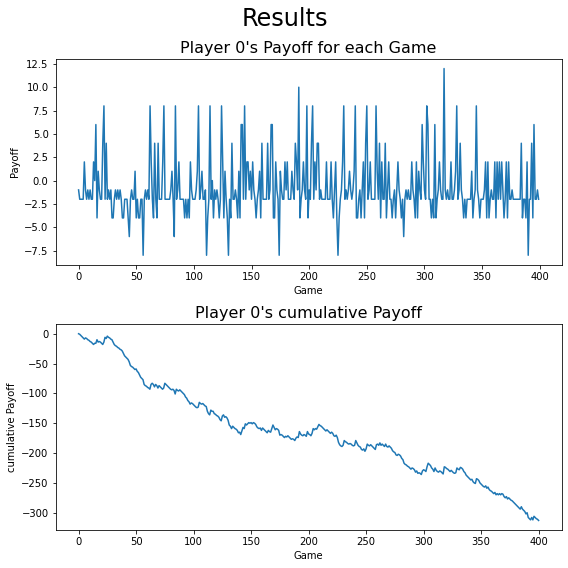

In [7]:
fig, axs = plt.subplots(2,1, figsize=(8, 8))

axs[0].plot(range(0, reward_history.shape[0]), reward_history[:,0])
# axs[0].plot(range(0, reward_history.shape[0]), reward_history[:,1])
axs[0].set_title("Player 0's Payoff for each Game", fontsize=16)
axs[0].set_xlabel('Game')
axs[0].set_ylabel('Payoff')

cum_rew_p_0 = cumulative_reward(reward_history[:,0])
# cum_rew_p_1 = cumulative_reward(reward_history[:,1])

axs[1].plot(range(0, len(cum_rew_p_0)), cum_rew_p_0)
# axs[1].plot(range(0, len(cum_rew_p_1)), cum_rew_p_1)
axs[1].set_title("Player 0's cumulative Payoff", fontsize=16)
axs[1].set_xlabel('Game')
axs[1].set_ylabel('cumulative Payoff')

plt.suptitle('Results', fontsize=24)

plt.tight_layout()
plt.show()